In [2]:
# Setting up spark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
print(spark)
print(spark.version)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

3.0.0-preview2


In [3]:
sql_df = sqlContext.read.format("csv").option("header", "true").load("hdfs://localhost:9000/eda/dc_rounds.csv")

In [4]:
spark_df=spark.read.csv("hdfs://localhost:9000/eda/dc_rounds.csv", header='true', inferSchema='true')

spark_df.printSchema()
spark_df.show(5)
spark_df.head(5)
spark_df.count()

root
 |-- _c0: integer (nullable = true)
 |-- company_permalink: string (nullable = true)
 |-- company_name: string (nullable = true)
 |-- company_category_list: string (nullable = true)
 |-- company_country_code: string (nullable = true)
 |-- funding_round_permalink: string (nullable = true)
 |-- funding_round_type: string (nullable = true)
 |-- funded_at: string (nullable = true)
 |-- raised_amount_usd: double (nullable = true)

+---+--------------------+--------------------+---------------------+--------------------+-----------------------+------------------+----------+-----------------+
|_c0|   company_permalink|        company_name|company_category_list|company_country_code|funding_round_permalink|funding_round_type| funded_at|raised_amount_usd|
+---+--------------------+--------------------+---------------------+--------------------+-----------------------+------------------+----------+-----------------+
|  0| /organization/-fame|               #fame|                Media|       

111538

In [5]:
spark_df.describe('company_name','company_category_list','company_country_code','funding_round_type').show()
#spark_df.describe().show()

+-------+--------------------+---------------------+--------------------+------------------+
|summary|        company_name|company_category_list|company_country_code|funding_round_type|
+-------+--------------------+---------------------+--------------------+------------------+
|  count|              111538|               111538|              111538|            111538|
|   mean|              2248.0|                  3.0|                null|              null|
| stddev|    3328.36181927386|                  0.0|                null|              null|
|    min|"Zwayo ""On-Deman...|                   3D|                 ALB|             angel|
|    max|    吃神马 ChiShenMa| mHealth|Software|...|                 ZWE|           venture|
+-------+--------------------+---------------------+--------------------+------------------+



In [6]:
spark_df[['raised_amount_usd']].describe().show()

+-------+--------------------+
|summary|   raised_amount_usd|
+-------+--------------------+
|  count|              111538|
|   mean|   9041282.096012121|
| stddev|1.0594593389534116E8|
|    min|                 0.0|
|    max|        2.1271935E10|
+-------+--------------------+



In [7]:
spark_df = spark_df.drop("company_permalink","_c0","funding_round_permalink")
spark_df.printSchema()
spark_df.select('funding_round_type').distinct().rdd.map(lambda r: r[0]).collect()

root
 |-- company_name: string (nullable = true)
 |-- company_category_list: string (nullable = true)
 |-- company_country_code: string (nullable = true)
 |-- funding_round_type: string (nullable = true)
 |-- funded_at: string (nullable = true)
 |-- raised_amount_usd: double (nullable = true)



['venture',
 'debt_financing',
 'post_ipo_equity',
 'equity_crowdfunding',
 'non_equity_assistance',
 'secondary_market',
 'angel',
 'convertible_note',
 'seed',
 'post_ipo_debt',
 'undisclosed',
 'private_equity',
 'product_crowdfunding',
 'grant']

In [8]:
spark_df.filter(spark_df['funding_round_type']=="secondary_market").show()

+-------------------+---------------------+--------------------+------------------+----------+-----------------+
|       company_name|company_category_list|company_country_code|funding_round_type| funded_at|raised_amount_usd|
+-------------------+---------------------+--------------------+------------------+----------+-----------------+
|            1stdibs|           E-Commerce|                 USA|  secondary_market|2015-09-09|        1670562.5|
|           50 Cubes| Fashion|Online Ga...|                 USA|  secondary_market|2012-01-01|        1670562.5|
|            AddThis| Advertising|Analy...|                 USA|  secondary_market|2014-09-01|        1670562.5|
|            Alibaba|           E-Commerce|                 CHN|  secondary_market|2014-04-01|            1.0E8|
|         AlienVault|             Security|                 USA|  secondary_market|2014-10-23|        1670562.5|
|      ANTs Software|             Software|                 USA|  secondary_market|2010-05-18|  

In [9]:
spark_df.filter(spark_df['company_category_list'].isNull()).count()

0

In [10]:
for col in spark_df.columns:
    print(col, "\t", "with null values: ", spark_df.filter(spark_df[col].isNull()).count())

company_name 	 with null values:  0
company_category_list 	 with null values:  0
company_country_code 	 with null values:  0
funding_round_type 	 with null values:  0
funded_at 	 with null values:  0
raised_amount_usd 	 with null values:  0


In [12]:
spark_df.crosstab('funding_round_type', 'company_country_code').show()

+---------------------------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+-----+---+---+---+---+---+---+
|funding_round_type_company_country_code|ALB|ARE|ARG|ARM|AUS|AUT|AZE|BAH|BEL|BGD|BGR|BHR|BLM|BLR|BLZ|BMU|BRA|BRB|BRN|BWA| CAN|CHE|CHL| CHN|CIV|CMR|COL|CRI|CYM|CYP|CZE|DEU|DMA|DNK|DOM|DZA|ECU|EGY|ESP|EST|FIN|FRA| GBR|GEO|GGY|GHA|GIB|GRC|GRD|GTM|HKG|HND|HRV|HUN|IDN|IND|IRL|IRN|ISL|ISR|ITA|JAM|JEY|JOR|JPN|KAZ|KEN|KHM|KNA|KOR|KWT|LAO|LBN|LIE|LKA|LTU|LUX|LVA|MAF|MAR|MCO|MDA|MEX|MKD|MLT|MMR|MNE|MOZ|MUS|MYS|N

In [13]:
spark_df.createOrReplaceTempView("dc_rounds")

In [14]:
sqlDF = spark.sql("SELECT funding_round_type FROM dc_rounds")
sqlDF.show()

+-------------------+
| funding_round_type|
+-------------------+
|            venture|
|            venture|
|               seed|
|            venture|
|            venture|
|            venture|
|        undisclosed|
|               seed|
|            venture|
|               seed|
|            venture|
|            venture|
|            venture|
|               seed|
|        undisclosed|
|               seed|
|               seed|
|equity_crowdfunding|
|equity_crowdfunding|
|        undisclosed|
+-------------------+
only showing top 20 rows



In [15]:
panda_df = spark_df.toPandas()
print(len(panda_df.columns))
print((panda_df.count()))

6
company_name             111538
company_category_list    111538
company_country_code     111538
funding_round_type       111538
funded_at                111538
raised_amount_usd        111538
dtype: int64


In [16]:
panda_df[['company_name','company_category_list','company_country_code','funding_round_type']].describe()

,company_name,company_category_list,company_country_code,funding_round_type
count,111538,111538,111538,111538
unique,63007,27296,137,14
top,Solarflare Communications,Biotechnology,USA,venture
freq,19,8165,78299,54362


In [17]:
panda_df.describe()

,raised_amount_usd
count,1.115380e+05
mean,9.041282e+06
std,1.059459e+08
min,0.000000e+00
25%,5.000000e+05
50%,1.670562e+06
75%,5.143361e+06
max,2.127194e+10


In [18]:
panda_df.head(10)

,company_name,company_category_list,company_country_code,funding_round_type,funded_at,raised_amount_usd
0,#fame,Media,IND,venture,2015-01-05,10000000.0
1,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,2014-10-14,1670562.5
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,2014-03-01,700000.0
3,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,USA,venture,2014-01-30,3406878.0
4,0-6.com,Curated Web,CHN,venture,2008-03-19,2000000.0
5,004 Technologies,Software,USA,venture,2014-07-24,1670562.5
6,01Games Technology,Games,HKG,undisclosed,2014-07-01,41250.0
7,Ondine Biomedical Inc.,Biotechnology,CAN,seed,2009-09-11,43360.0
8,Ondine Biomedical Inc.,Biotechnology,CAN,venture,2009-12-21,719491.0
9,H2O.ai,Analytics,USA,seed,2013-05-22,3000000.0


In [19]:
panda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111538 entries, 0 to 111537
Data columns (total 6 columns):
company_name             111538 non-null object
company_category_list    111538 non-null object
company_country_code     111538 non-null object
funding_round_type       111538 non-null object
funded_at                111538 non-null object
raised_amount_usd        111538 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


In [20]:
count1=panda_df['company_category_list'].value_counts()
cc_list=count1.head(10)
print(cc_list)

Biotechnology          8165
Software               6616
Health Care            2239
Clean Technology       2172
E-Commerce             2167
Mobile                 2161
Hardware + Software    1782
Enterprise Software    1763
Curated Web            1606
Games                  1347
Name: company_category_list, dtype: int64


In [21]:
count2=panda_df['company_country_code'].value_counts()
acn_list=count2.head(10)
print(acn_list)

USA    78299
GBR     5869
CAN     3063
CHN     2641
IND     2189
DEU     1697
FRA     1621
ISR     1606
ESP     1225
AUS      740
Name: company_country_code, dtype: int64


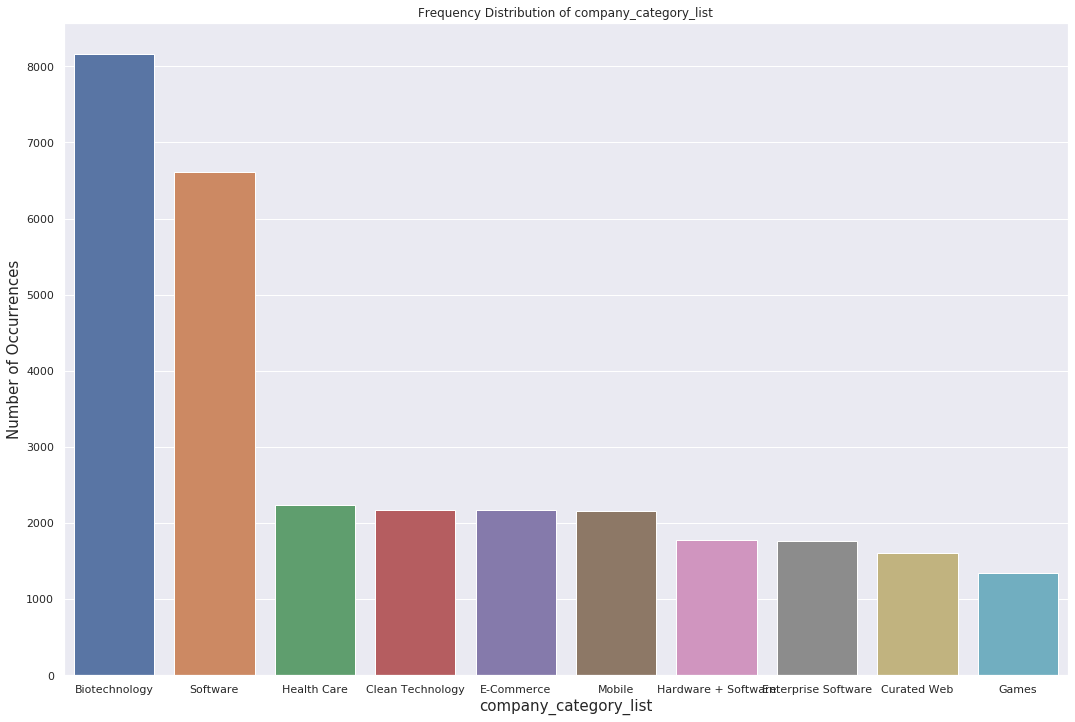

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,12)})
sns.set(style="darkgrid")
sns.barplot(cc_list.index, cc_list.values, alpha=1)
plt.title('Frequency Distribution of company_category_list')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('company_category_list', fontsize=15)
plt.show()

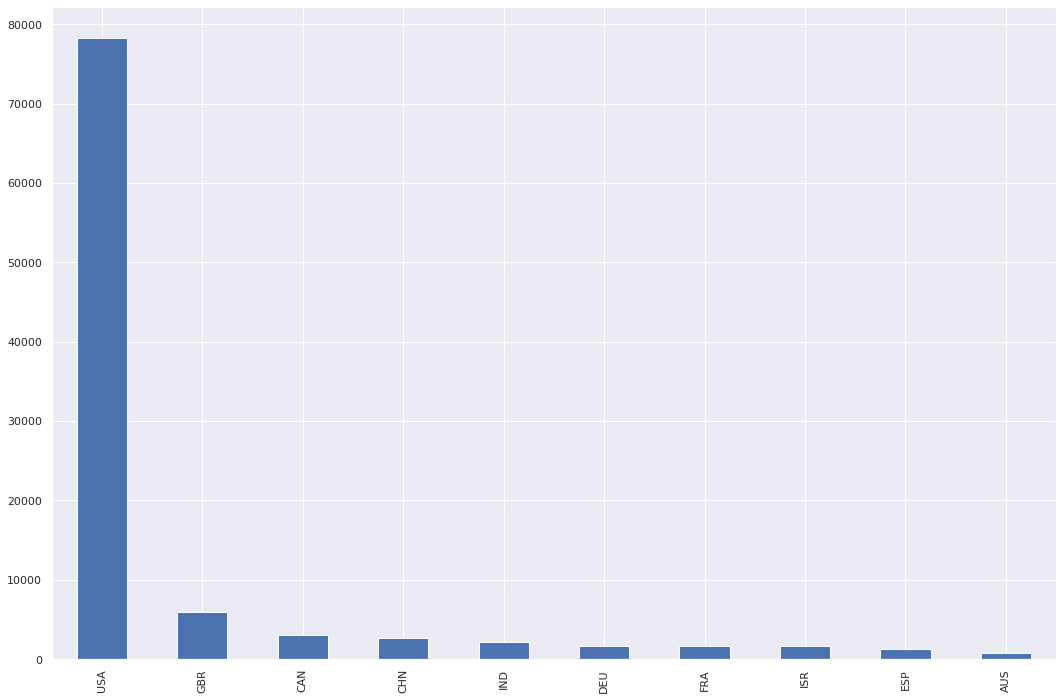

In [23]:
acn_list.plot.bar()

In [24]:
count3=panda_df['funding_round_type'].value_counts()
fund_list=count3.head(10)
print(fund_list)

venture                54362
seed                   29415
debt_financing          6851
angel                   5954
undisclosed             4384
equity_crowdfunding     3045
private_equity          2168
grant                   2148
convertible_note        1769
post_ipo_equity          634
Name: funding_round_type, dtype: int64


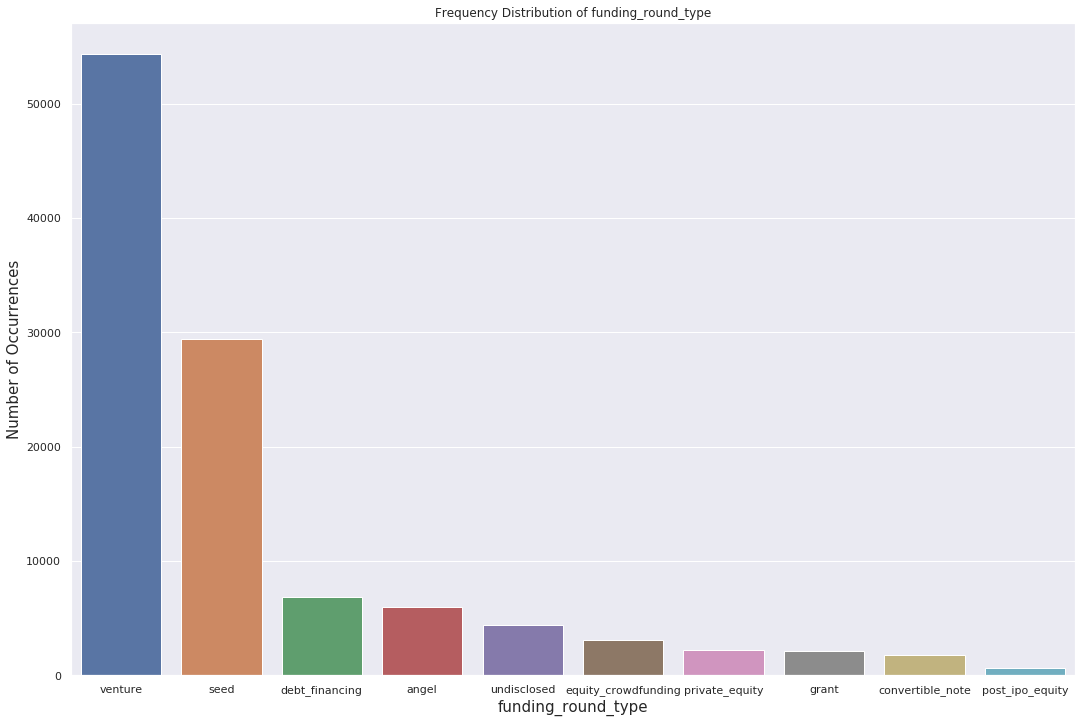

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,12)})
sns.set(style="darkgrid")
sns.barplot(fund_list.index, fund_list.values, alpha=1)
plt.title('Frequency Distribution of funding_round_type')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('funding_round_type', fontsize=15)
plt.show()